In [4]:
# Imports
import pandas as pd
import time

import numpy as np
from numpy.lib.format import open_memmap

import matplotlib.pyplot as plt
%matplotlib inline

from pycbc.types.timeseries import TimeSeries
from pycbc.detector import Detector
from pycbc.waveform import get_td_waveform
from pycbc.filter import match, overlap

3489
3489
3556
3556
Projection time: 0.007261753082275391
Total time: 0.6400549411773682


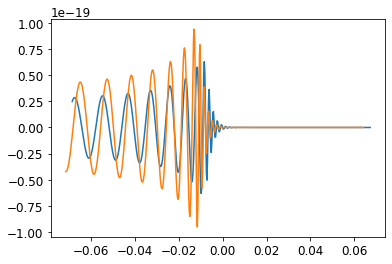

In [5]:
# Use PyCBC Detector.project_wave(hp, hc, ra, dec, polarization, method='lal')
start_time = time.time()

ra = 2.2
dec = 1.26
pol = 2.23

hp, hc = get_td_waveform(approximant='SEOBNRv4',
                        mass1=15,
                        mass2=20,
                        spin1z=0.1,
                        spin2z=0.3,
                        inclination=1.96,
                        coa_phase=6.27,
                        delta_t=1.0/4096,
                        f_lower=30)

print(len(hp.data))
print(len(hc.data))

project_start_time = time.time()

h1 = Detector('H1')
l1 = Detector('L1')

h1_strain_lal = h1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='lal')
l1_strain_lal = l1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='lal')

print(len(h1_strain_lal.data))
print(len(l1_strain_lal.data))

print(f"Projection time: {time.time() - project_start_time}")
print(f"Total time: {time.time() - start_time}")

plt.plot(l1_strain_lal.sample_times[3000:], l1_strain_lal[3000:])
plt.plot(h1_strain_lal.sample_times[3000:], h1_strain_lal[3000:])
plt.show()

3489
3489
3489
3489
Projection time: 0.5793850421905518
Total time: 1.2444069385528564


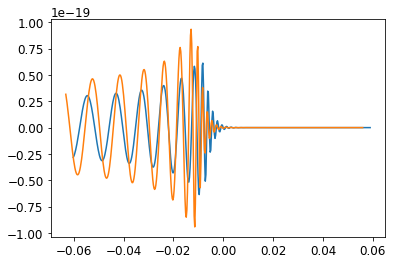

In [6]:
# Use PyCBC Detector.project_wave(hp, hc, ra, dec, polarization, method='constant')
start_time = time.time()

ra = 2.2
dec = 1.26
pol = 2.23

hp, hc = get_td_waveform(approximant='SEOBNRv4',
                        mass1=15,
                        mass2=20,
                        spin1z=0.1,
                        spin2z=0.3,
                        inclination=1.96,
                        coa_phase=6.27,
                        delta_t=1.0/4096,
                        f_lower=30)

print(len(hp.data))
print(len(hc.data))

project_start_time = time.time()

h1 = Detector('H1')
l1 = Detector('L1')

h1_strain_const = h1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='constant')
l1_strain_const = l1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='constant')

print(len(h1_strain_const.data))
print(len(l1_strain_const.data))

print(f"Projection time: {time.time() - project_start_time}")
print(f"Total time: {time.time() - start_time}")

plt.plot(l1_strain_const.sample_times[3000:], l1_strain_const[3000:])
plt.plot(h1_strain_const.sample_times[3000:], h1_strain_const[3000:])
plt.show()

3489
3489
3489
3489
Projection time: 0.012391805648803711
Total time: 0.6543254852294922


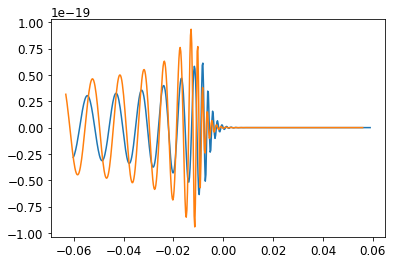

In [7]:
# Use PyCBC Detector.project_wave(hp, hc, ra, dec, polarization, method='vary_polarization')
start_time = time.time()

ra = 2.2
dec = 1.26
pol = 2.23

hp, hc = get_td_waveform(approximant='SEOBNRv4',
                        mass1=15,
                        mass2=20,
                        spin1z=0.1,
                        spin2z=0.3,
                        inclination=1.96,
                        coa_phase=6.27,
                        delta_t=1.0/4096,
                        f_lower=30)

print(len(hp.data))
print(len(hc.data))

project_start_time = time.time()

h1 = Detector('H1')
l1 = Detector('L1')

h1_strain_vary_pol = h1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='vary_polarization')
l1_strain_vary_pol = l1.project_wave(hp=hp, hc=hc, ra=ra, dec=dec, polarization=pol, method='vary_polarization')

print(len(h1_strain_vary_pol.data))
print(len(l1_strain_vary_pol.data))

print(f"Projection time: {time.time() - project_start_time}")
print(f"Total time: {time.time() - start_time}")

plt.plot(l1_strain_vary_pol.sample_times[3000:], l1_strain_vary_pol[3000:])
plt.plot(h1_strain_vary_pol.sample_times[3000:], h1_strain_vary_pol[3000:])
plt.show()

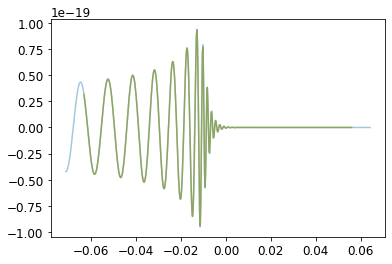

In [8]:
plt.plot(h1_strain_lal.sample_times[3000:], h1_strain_lal[3000:], alpha=0.4)
plt.plot(h1_strain_const.sample_times[3000:], h1_strain_const[3000:], alpha=0.4)
plt.plot(h1_strain_vary_pol.sample_times[3000:], h1_strain_vary_pol[3000:], alpha=0.4)
plt.show()

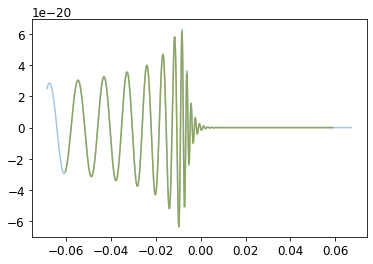

In [9]:
plt.plot(l1_strain_lal.sample_times[3000:], l1_strain_lal[3000:], alpha=0.4)
plt.plot(l1_strain_const.sample_times[3000:], l1_strain_const[3000:], alpha=0.4)
plt.plot(l1_strain_vary_pol.sample_times[3000:], l1_strain_vary_pol[3000:], alpha=0.4)
plt.show()

Start time of const/vary: -0.795617542
Start time of lal: -0.803710938


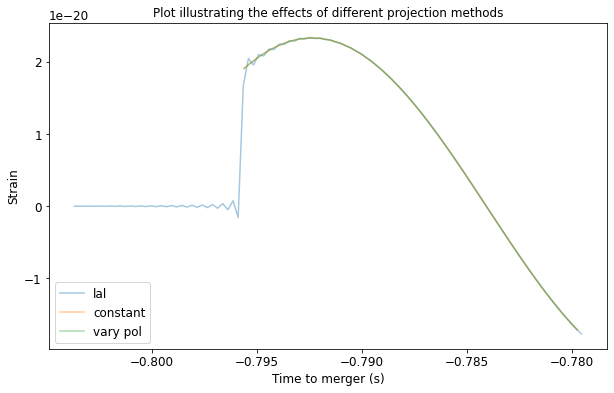

In [15]:
print(f"Start time of const/vary: {h1_strain_const.sample_times[0]}")
print(f"Start time of lal: {h1_strain_lal.sample_times[0]}")

plt.figure(figsize=(10,6))
plt.plot(h1_strain_lal.sample_times[:100], h1_strain_lal.data[:100], alpha=0.4, label='lal')
plt.plot(h1_strain_const.sample_times[:66], h1_strain_const.data[:66], alpha=0.4, label='constant')
plt.plot(h1_strain_vary_pol.sample_times[:66], h1_strain_vary_pol.data[:66], alpha=0.4, label='vary pol')
plt.xlabel('Time to merger (s)')
plt.ylabel('Strain')
plt.title('Plot illustrating the effects of different projection methods')
plt.legend(loc='lower left')
plt.show()

Start time of const/vary: -0.79261195
Start time of lal: -0.80078125


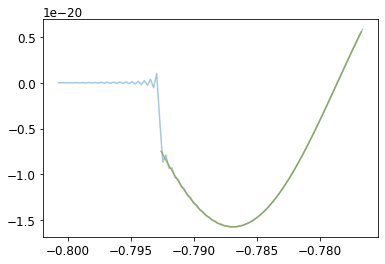

In [24]:
print(f"Start time of const/vary: {l1_strain_const.sample_times[0]}")
print(f"Start time of lal: {l1_strain_lal.sample_times[0]}")

plt.plot(l1_strain_lal.sample_times[:100], l1_strain_lal.data[:100], alpha=0.4)
plt.plot(l1_strain_const.sample_times[:66], l1_strain_const.data[:66], alpha=0.4)
plt.plot(l1_strain_vary_pol.sample_times[:66], l1_strain_vary_pol.data[:66], alpha=0.4)
plt.show()

End time of const/vary: 0.05594495799999999
End time of lal: 0.06420898387499996


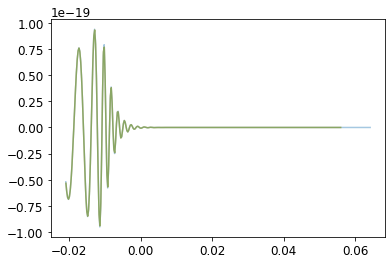

In [22]:
print(f"End time of const/vary: {h1_strain_const.sample_times[-1]}")
print(f"End time of lal: {h1_strain_lal.sample_times[-1]}")

plt.plot(h1_strain_lal.sample_times[-350:], h1_strain_lal.data[-350:], alpha=0.4)
plt.plot(h1_strain_const.sample_times[-316:], h1_strain_const.data[-316:], alpha=0.4)
plt.plot(h1_strain_vary_pol.sample_times[-316:], h1_strain_vary_pol.data[-316:], alpha=0.4)
plt.show()

End time of const/vary: 0.05594495799999999
End time of lal: 0.06420898387499996


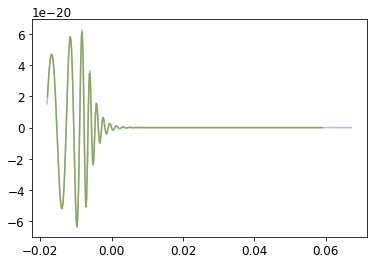

In [25]:
print(f"End time of const/vary: {h1_strain_const.sample_times[-1]}")
print(f"End time of lal: {h1_strain_lal.sample_times[-1]}")

plt.plot(l1_strain_lal.sample_times[-350:], l1_strain_lal.data[-350:], alpha=0.4)
plt.plot(l1_strain_const.sample_times[-316:], l1_strain_const.data[-316:], alpha=0.4)
plt.plot(l1_strain_vary_pol.sample_times[-316:], l1_strain_vary_pol.data[-316:], alpha=0.4)
plt.show()

In [15]:
# Slice the lal result to original length due to edge effects
h1_strain_lal_sliced = h1_strain_lal.time_slice(start=h1_strain_const.sample_times[0], end=h1_strain_const.sample_times[-1])
l1_strain_lal_sliced = l1_strain_lal.time_slice(start=l1_strain_const.sample_times[0], end=l1_strain_const.sample_times[-1])

print(len(h1_strain_lal))
print(len(h1_strain_lal_sliced))
print(len(h1_strain_const))
print(len(h1_strain_vary_pol))

print(len(l1_strain_lal))
print(len(l1_strain_lal_sliced))
print(len(l1_strain_const))
print(len(l1_strain_vary_pol))

3556
3488
3489
3489
3556
3488
3489
3489


In [16]:
# Overlaps between projected waveforms and the original (H1)
# This won't work because they have been time-shifted. Kind of pointless trying

h1_overlap_lal_hp = min(
    [overlap(h1_strain_lal_sliced, hp, psd=None, low_frequency_cutoff=30),
    overlap(hp, h1_strain_lal_sliced, psd=None, low_frequency_cutoff=30)]
)

h1_overlap_const_hp = min(
    [overlap(hp, h1_strain_vary_pol, psd=None, low_frequency_cutoff=30),
    overlap(h1_strain_vary_pol, hp, psd=None, low_frequency_cutoff=30)]
)

h1_overlap_vary_pol_hp = min(
    [overlap(hp, h1_strain_vary_pol, psd=None, low_frequency_cutoff=30),
    overlap(h1_strain_vary_pol, hp, psd=None, low_frequency_cutoff=30)]
)

print("Minimum Overlap H1 lal-hp %s" % h1_overlap_lal_hp)
print("Minimum Overlap H1 const-hp %s" % h1_overlap_const_hp)
print("Minimum Overlap H1 vary pol-hp %s" % h1_overlap_vary_pol_hp)

Minimum Overlap H1 lal-hp -0.6089353676712917
Minimum Overlap H1 const-hp -0.6982945184296534
Minimum Overlap H1 vary pol-hp -0.6982945184296534


In [17]:
# Overlaps between projected waveforms and the original (H1)


In [18]:
# Overlaps between all projected waveforms (H1)

h1_overlap_lal_const = min(
    [overlap(h1_strain_lal_sliced, h1_strain_const, psd=None, low_frequency_cutoff=30),
    overlap(h1_strain_const, h1_strain_lal_sliced, psd=None, low_frequency_cutoff=30)]
)

h1_overlap_lal_vary_pol = min(
    [overlap(h1_strain_lal_sliced, h1_strain_vary_pol, psd=None, low_frequency_cutoff=30),
    overlap(h1_strain_vary_pol, h1_strain_lal_sliced, psd=None, low_frequency_cutoff=30)]
)

h1_overlap_const_vary_pol = min(
    [overlap(h1_strain_const, h1_strain_vary_pol, psd=None, low_frequency_cutoff=30),
    overlap(h1_strain_vary_pol, h1_strain_const, psd=None, low_frequency_cutoff=30)]
)

print("Minimum Overlap H1 lal-const %s" % h1_overlap_lal_const)
print("Minimum Overlap H1 lal-vary pol %s" % h1_overlap_lal_vary_pol)
print("Minimum Overlap H1 const-vary pol %s" % h1_overlap_const_vary_pol)

Minimum Overlap H1 lal-const 0.9838840119036439
Minimum Overlap H1 lal-vary pol 0.9838895498102985
Minimum Overlap H1 const-vary pol 0.9999999988952525


In [19]:
# Overlaps between all projected waveforms (L1)

l1_overlap_lal_const = min(
    [overlap(l1_strain_lal_sliced, l1_strain_const, psd=None, low_frequency_cutoff=30),
    overlap(l1_strain_const, l1_strain_lal_sliced, psd=None, low_frequency_cutoff=30)]
)

l1_overlap_lal_vary_pol = min(
    [overlap(l1_strain_lal_sliced, l1_strain_vary_pol, psd=None, low_frequency_cutoff=30),
    overlap(l1_strain_vary_pol, l1_strain_lal_sliced, psd=None, low_frequency_cutoff=30)]
)

l1_overlap_const_vary_pol = min(
    [overlap(l1_strain_const, l1_strain_vary_pol, psd=None, low_frequency_cutoff=30),
    overlap(l1_strain_vary_pol, l1_strain_const, psd=None, low_frequency_cutoff=30)]
)

print("Minimum Overlap L1 lal-const %s" % l1_overlap_lal_const)
print("Minimum Overlap L1 lal-vary pol %s" % l1_overlap_lal_vary_pol)
print("Minimum Overlap L1 const-vary pol %s" % l1_overlap_const_vary_pol)

Minimum Overlap L1 lal-const 0.973328675505188
Minimum Overlap L1 lal-vary pol 0.9733379239210403
Minimum Overlap L1 const-vary pol 0.9999999980428912
